In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('bengkel.xlsx', sheet_name='Sheet1')
data.head()

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4


In [2]:
data.shape

(100, 3)

In [3]:
data.dtypes

id        int64
servis    int64
harga     int64
dtype: object

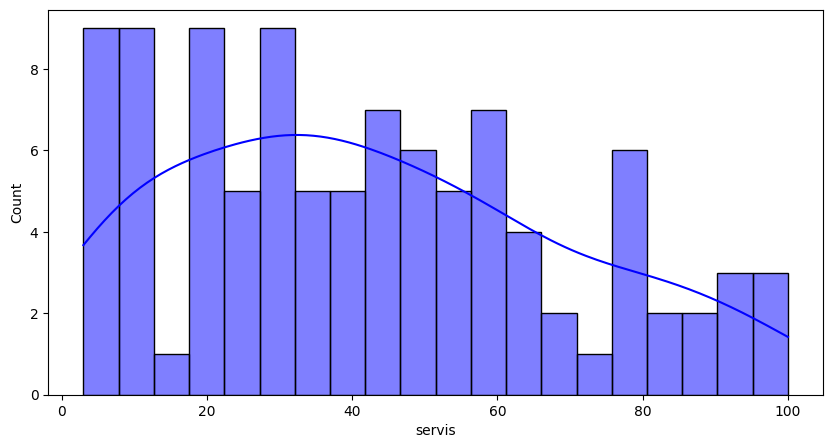

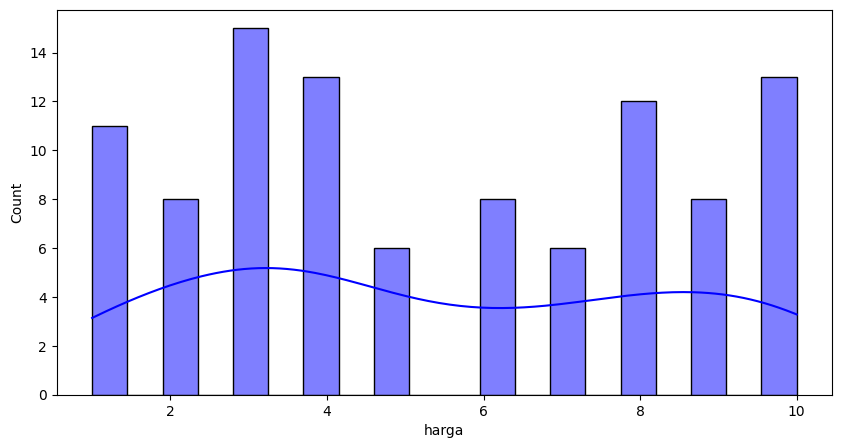

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data_to_plot = data.drop(['id'], axis=1)
for col in data_to_plot.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_to_plot[col], bins=20, kde=True, color='blue', edgecolor='black')
    plt.xlabel(col)
    plt.show()

### Aturan Inferensi

In [5]:
SERVICE = {
    'LOW': {
        'A': 0,
        'B': 0,
        'C': 20,
        'D': 35,
    },
    'STANDARD': {
        'A': 20,
        'B': 35,
        'C': 60,
        'D': 85,
    },
    'HIGH': {
        'A': 60,
        'B': 85,
        'C': 100,
        'D': 100,
    },
}

PRICE = {
    'CHEAP': {
        'A': 0,
        'B': 0,
        'C': 3,
        'D': 5,
    },
    'STANDARD': {
        'A': 3,
        'B': 5,
        'C': 6,
        'D': 8,
    },
    'EXPENSIVE': {
        'A': 6,
        'B': 8,
        'C': 10,
        'D': 10,
    },
}

WORTHINESS = {
    'BAD': {
        'A': 0,
        'B': 0,
        'C': 40,
        'D': 70,
    },
    'GOOD': {
        'A': 40,
        'B': 70,
        'C': 80,
        'D': 90,
    },
    'EXCELLENT': {
        'A': 80,
        'B': 90,
        'C': 100,
        'D': 100,
    }
}

### Fungsi Keanggotaan

Fungsi keanggotaan harga

In [6]:
def membership_price_cheap(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']

    if value <= a or value >= d:
        return 0
    
    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)
    
def membership_price_standard(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0

    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)
    
def membership_price_expensive(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0

    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)

Fungsi keanggotaan servis

In [7]:
def membership_service_low(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0
    
    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)
    

def membership_service_standard(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0

    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)
    

def membership_service_high(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
        
    if value <= a or value >= d:
        return 0

    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)

Fungsi keanggotaan kelayakan

In [8]:
def membership_worthiness_bad(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0
    
    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)
    
def membership_worthiness_good(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0

    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)
    

def membership_worthiness_excellent(value, rules):
    a = rules['A']
    b = rules['B']
    c = rules['C']
    d = rules['D']
    
    if value <= a or value >= d:
        return 0

    if a < value < b:
        return (value - a) / (b - a)
    
    if b <= value <= c:
        return 1
    
    if c < value < d:
        return -(value - d) / (d - c)

### Fuzzification

In [9]:
def fuzzy_service(value):
    return {
        'LOW': membership_service_low(value, SERVICE['LOW']),
        'STANDARD': membership_service_standard(value, SERVICE['STANDARD']),
        'HIGH': membership_service_high(value, SERVICE['HIGH']),
    }

def fuzzy_price(value):
    return {
        'CHEAP': membership_price_cheap(value, PRICE['CHEAP']),
        'STANDARD': membership_price_standard(value, PRICE['STANDARD']),
        'EXPENSIVE': membership_price_expensive(value, PRICE['EXPENSIVE']),
    }

### Inference

In [10]:
def inference(service, price):
    result = {
        'bad': [],
        'good': [],
        'excellent': [],
    }

    service_low = service['LOW']
    service_standard = service['STANDARD']
    service_high = service['HIGH']

    price_cheap = price['CHEAP']
    price_standard = price['STANDARD']
    price_expensive = price['EXPENSIVE']

    if service_low > 0 and price_cheap > 0:
        result['bad'].append(min(service_low, price_cheap))
    if service_low > 0 and price_standard > 0:
        result['bad'].append(min(service_low, price_standard))
    if service_low > 0 and price_expensive > 0:
        result['bad'].append(min(service_low, price_expensive))

    if service_standard > 0 and price_cheap > 0:
        result['good'].append(min(service_standard, price_cheap))
    if service_standard > 0 and price_standard > 0:
        result['good'].append(min(service_standard, price_standard))
    if service_standard > 0 and price_expensive > 0:
        result['bad'].append(min(service_standard, price_expensive))

    if service_high > 0 and price_cheap > 0:
        result['excellent'].append(min(service_high, price_cheap))
    if service_high > 0 and price_standard > 0:
        result['good'].append(min(service_high, price_standard))
    if service_high > 0 and price_expensive > 0:
        result['good'].append(min(service_high, price_expensive))

    return result

### Defuzzification

In [11]:
def defuzzification(worthiness, rules):
    bad = max(worthiness['bad']) if len(worthiness['bad']) > 0 else 0
    good = max(worthiness['good']) if len(worthiness['good']) > 0 else 0
    excellent = max(worthiness['excellent']) if len(worthiness['excellent']) > 0 else 0
    points = []

    np.random.seed(12345)
    # Dapatkan random point berdasarkan kondisi
    if bad > 0 and good > 0:
        points = np.random.uniform(0, rules['GOOD']['D'], 10)
    elif good > 0 and excellent > 0:
        points = np.random.uniform(rules['GOOD']['A'], rules['GOOD']['D'], 10)
    elif bad > 0:
        points = np.random.uniform(rules['BAD']['A'], rules['BAD']['D'], 10)
    elif good > 0:
        points = np.random.uniform(rules['GOOD']['A'], rules['GOOD']['D'], 10)
    elif excellent > 0:
        points = np.random.uniform(rules['EXCELLENT']['A'], rules['EXCELLENT']['D'], 10)

    weight_avg = 0
    weight = 0

    for point in points:
        f = 0  # Initialize f to zero

        if point > rules['EXCELLENT']['A']:
            f = membership_worthiness_excellent(point, WORTHINESS['EXCELLENT'])
        elif point > rules['GOOD']['A']:
            f = membership_worthiness_good(point, WORTHINESS['GOOD'])
        else:
            f = membership_worthiness_bad(point, WORTHINESS['BAD'])

        weight_avg += point * f
        weight += f

    if weight == 0:
        return 0  # Avoid division by zero
    else:
        return weight_avg / weight


### Visualisasi Fungsi Keanggotaan

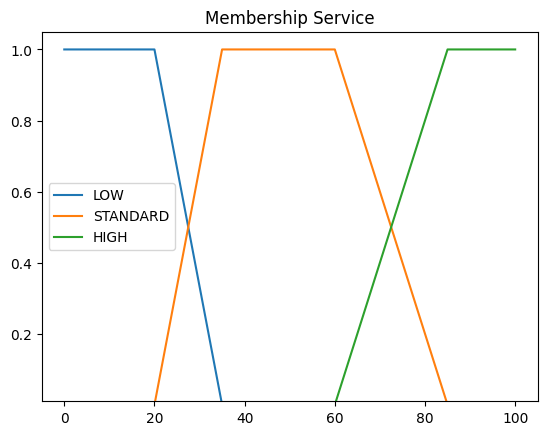

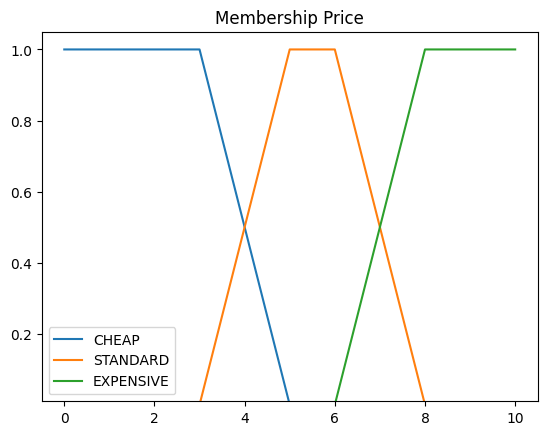

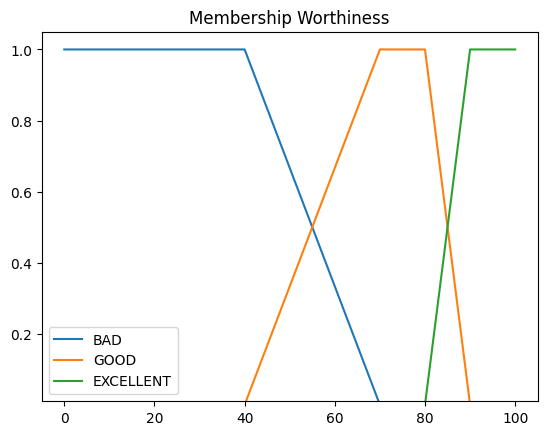

In [12]:
def visualize_membership(title, labels, rules):
    x = np.linspace(1, 100, 100)

    plt.plot([rules[0]['A'], rules[0]['C'], rules[0]['D']], [1, 1, 0], label=labels[0])
    plt.plot([rules[1]['A'], rules[1]['B'], rules[1]['C'], rules[1]['D']], [0, 1, 1, 0], label=labels[1])
    plt.plot([rules[2]['A'], rules[2]['B'], rules[2]['C']], [0, 1, 1], label=labels[2])

    plt.title(title)
    plt.legend()
    plt.ylim(0.01)
    plt.show()


labels_service = ['LOW', 'STANDARD', 'HIGH']
labels_price = ['CHEAP', 'STANDARD', 'EXPENSIVE']
labels_worthiness = ['BAD', 'GOOD', 'EXCELLENT']

rules_service = [SERVICE['LOW'], SERVICE['STANDARD'], SERVICE['HIGH']]
rules_price = [PRICE['CHEAP'], PRICE['STANDARD'], PRICE['EXPENSIVE']]
rules_worthiness = [WORTHINESS['BAD'], WORTHINESS['GOOD'], WORTHINESS['EXCELLENT']]

visualize_membership('Membership Service', labels_service, rules_service)
visualize_membership('Membership Price', labels_price, rules_price)
visualize_membership('Membership Worthiness', labels_worthiness, rules_worthiness)

### Main

In [13]:
data_list = data.to_numpy()

result = []
for i in range(len(data_list)):
    inf = inference(fuzzy_service(data_list[i][1]), fuzzy_price(data_list[i][2]))
    defuzzy = defuzzification(inf, WORTHINESS)
    temp = [i + 1, data_list[i][1], data_list[i][2], defuzzy]
    result.append(temp)

result.sort(key=lambda x: x[3], reverse=True)

best = result[:5]

best = pd.DataFrame(best, columns=['id', 'servis', 'harga', 'skor'])
best.to_excel('hasil.xlsx', index=False)

best.head()


,id,servis,harga,skor
0,3,98,2,92.995890
1,52,94,3,92.995890
2,91,98,3,92.995890
3,2,54,1,72.124393
4,4,52,4,72.124393
